In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

IMPORTO IL FILE

In [137]:
df=pd.read_csv('temp_glob')
pd.read_csv('temp_glob')


,YEAR,TEMP
0,1900,2.73530
1,1901,2.85845
2,1902,2.78148
3,1903,2.85732
4,1904,2.82464
...,...,...
113,2013,3.86149
114,2014,3.81942
115,2015,4.17442
116,2016,4.05367


PLOTTO

SOSTITUISCO L'ASSE X CON GLI ANNI DAL 1900 AL 2017

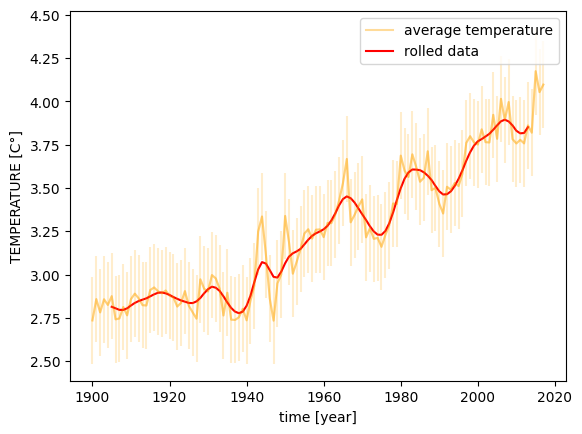

In [138]:
x=df['YEAR']
y=df['TEMP']
y_err=0.25
plt.plot(x,y,color='orange',alpha=0.4,label='average temperature')
plt.plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='red', label='rolled data')
plt.xlabel('time [year]')
plt.ylabel('TEMPERATURE [C°]')
plt.errorbar(x, y, yerr=y_err, color='orange',alpha=0.2)
plt.legend()


FACCIO IL FIT DEI DATI

Power_divergenceResult(statistic=5.633355168332108, pvalue=1.0)


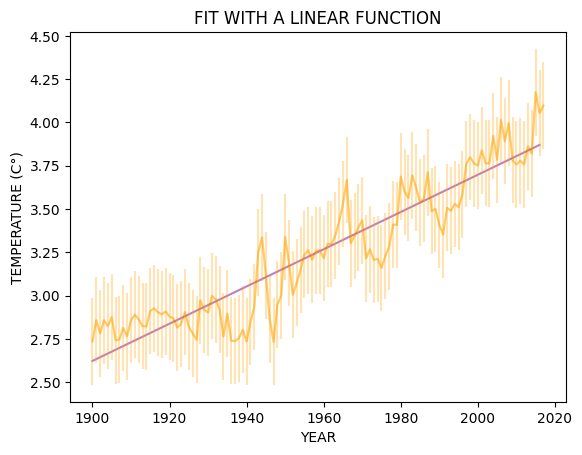

In [139]:
plt.plot(x,y,color='orange',alpha=0.4,label='average temperature')
linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(1900,2017)
plt.plot(x_s,linear_model_fn(x_s),color="purple",alpha=0.5)
plt.errorbar(x, y, yerr=y_err, color='orange',alpha=0.3)
plt.title('FIT WITH A LINEAR FUNCTION')
plt.xlabel('YEAR')
plt.ylabel('TEMPERATURE (C°)')
print(stats.chisquare(y))


Text(0, 0.5, 'TEMPERATURE (C°)')

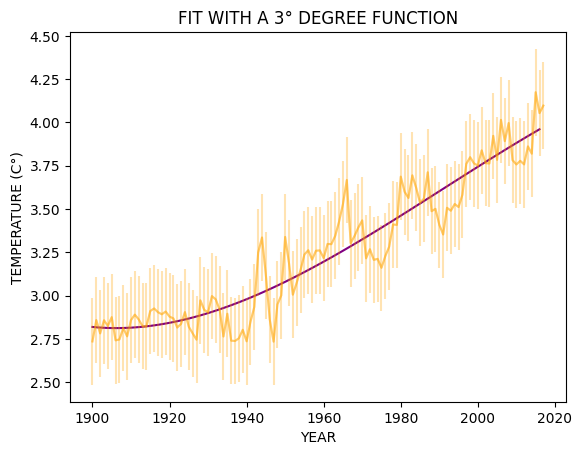

In [140]:
linear_model=np.polyfit(x,y,3)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(1900,2017)
plt.plot(x_s,linear_model_fn(x_s),color="purple",label='fit')
plt.errorbar(x, y, yerr=y_err, color='orange',alpha=0.3)
plt.plot(x,y,color='orange',alpha=0.4,label='average temperature')
plt.title('FIT WITH A 3° DEGREE FUNCTION')
plt.xlabel('YEAR')
plt.ylabel('TEMPERATURE (C°)')



Text(0, 0.5, 'TEMPERATURE (C°)')

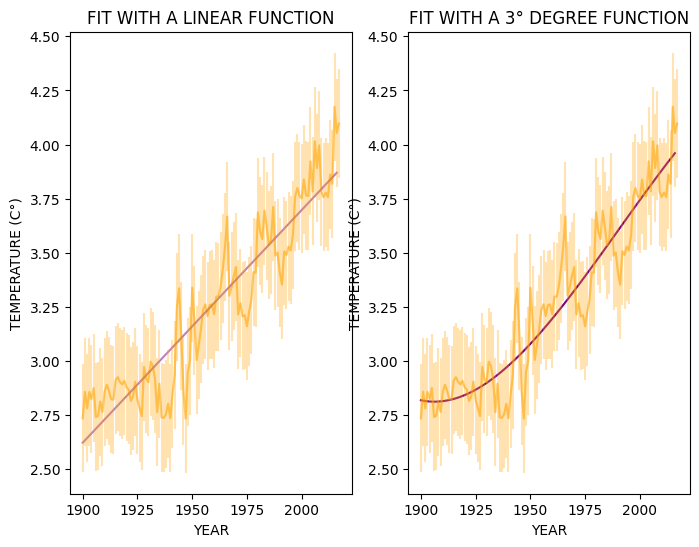

In [112]:
fig, axs = plt.subplots(1,2, figsize=(8, 6))
plt.subplot(1,2,1)
plt.plot(x,y,color='orange',alpha=0.4,label='average temperature')
linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(1900,2017)
plt.plot(x_s,linear_model_fn(x_s),color="purple",alpha=0.5)
plt.errorbar(x, y, yerr=y_err, color='orange',alpha=0.3)
plt.title('FIT WITH A LINEAR FUNCTION')
plt.xlabel('YEAR')
plt.ylabel('TEMPERATURE (C°)')

plt.subplot(1,2,2)
linear_model=np.polyfit(x,y,3)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(1900,2017)
plt.plot(x_s,linear_model_fn(x_s),color="purple",label='fit')
plt.errorbar(x, y, yerr=y_err, color='orange',alpha=0.3)
plt.plot(x,y,color='orange',alpha=0.4,label='average temperature')
plt.title('FIT WITH A 3° DEGREE FUNCTION')
plt.xlabel('YEAR')
plt.ylabel('TEMPERATURE (C°)')


FIT LINEARE 1900-1930

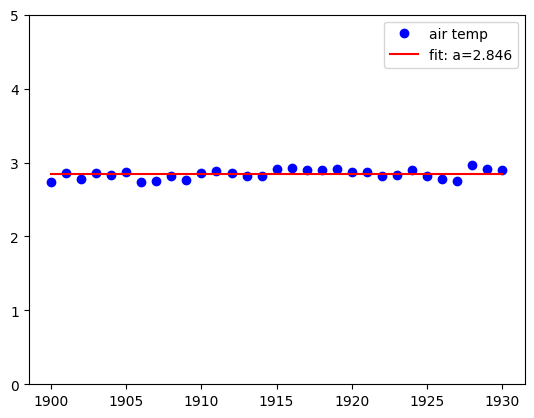

ValueError: operands could not be broadcast together with shapes (31,) (118,) 

In [142]:
x1=df['YEAR'].iloc[list(range(0,31))]
y1=df['TEMP'].iloc[list(range(0,31))]

import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

def const_func(x, a):
    return np.ones_like(x) * a

popt, pcov = curve_fit(const_func, x1, y1)
plt.plot(x1, y1, 'bo', label='air temp')
plt.plot(x1, const_func(x1, *popt), 'r-', label='fit: a=%5.3f'  % tuple(popt))
plt.ylim(0,5)
plt.legend()
plt.show()

yfit = const_func(x, *popt)
residuals = y1 - yfit
chi_squared = np.sum(residuals**2) / (len(y) - 1)

print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y1))


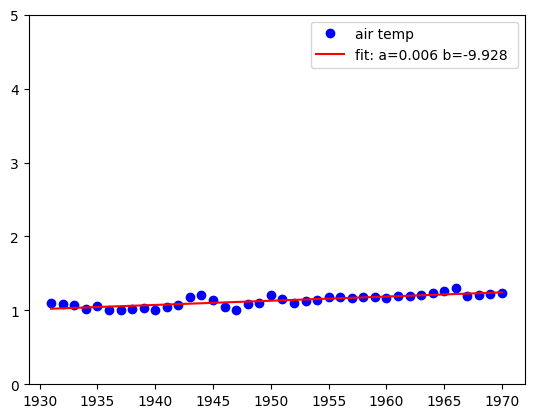

Chi quadrato = 0.0022
Power_divergenceResult(statistic=0.22479049123827372, pvalue=1.0)


In [151]:
x2=df['YEAR'].iloc[list(range(31,71))]
y2=np.log(df['TEMP'].iloc[list(range(31,71))])

import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear_func, x2, y2)


plt.plot(x2, y2, 'bo', label='air temp')
plt.plot(x2, linear_func(x2,*popt), 'r-', label='fit: a=%5.3f b=%5.3f ' % tuple(popt))
#plt.yscale("log")
plt.legend()
plt.ylim(0,5)
plt.show()

yfit = linear_func(x2, *popt)
residuals = y2 - yfit
chi_squared = np.sum(residuals**2) / (len(y2) - 2)

print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y2))


In [147]:
x3=df['YEAR'].iloc[list(range(71,118))]
y3=df['TEMP'].iloc[list(range(71,118))]

import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear_func, x3, y3)


axs[0].plot(x3, y3, 'bo', label='air temp')
axs[0].plot(x3, linear_func(x3,*popt), 'r-', label='fit: a=%5.3f b=%5.3f ' % tuple(popt))
axs[0].legend()
axs[0].set_ylim(0,5)


yfit = linear_func(x3, *popt)
residuals = y3 - yfit
chi_squared = np.sum(residuals**2) / (len(y3) - 2)

print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y3))




Chi quadrato = 0.0158
Power_divergenceResult(statistic=0.8229029871197393, pvalue=1.0)


SUBPLOTS

/tmp/ipykernel_4088/237504453.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(x1, y1, 'bo', label='air temp',marker = 'x')
/tmp/ipykernel_4088/237504453.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  axs[2].plot(x2, y2, 'bo', label='air temp', marker='x')


Chi quadrato = 0.0010
Power_divergenceResult(statistic=0.04044682398587987, pvalue=1.0)
Chi quadrato = 0.0019
Power_divergenceResult(statistic=0.8263665234775933, pvalue=1.0)


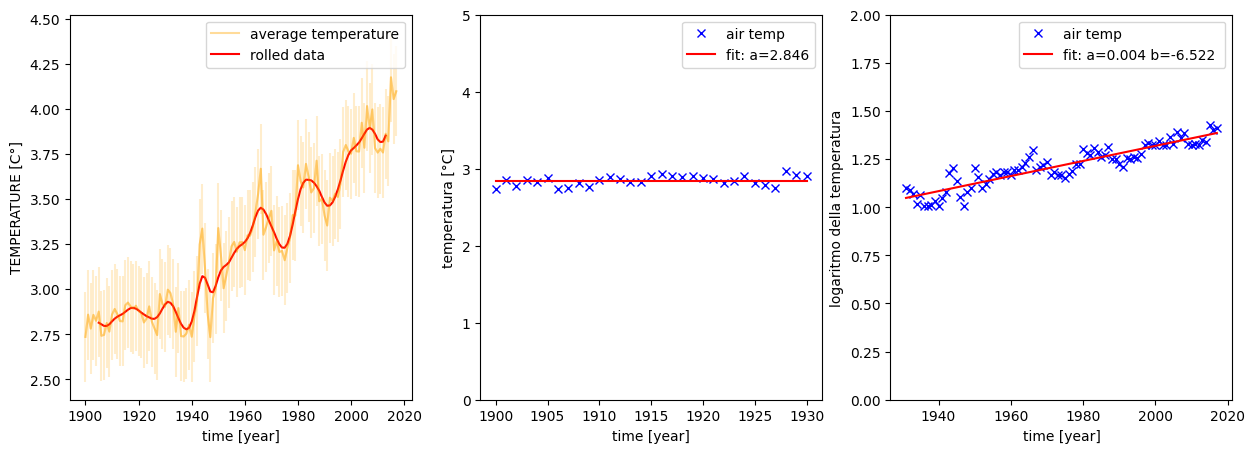

In [114]:
x1=df['YEAR'].iloc[list(range(0,31))]
y1=df['TEMP'].iloc[list(range(0,31))]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
def const_func(x, a):
    return np.ones_like(x) * a
popt, pcov = curve_fit(const_func, x1, y1)

y_err=0.25
axs[0].plot(x,y,color='orange',alpha=0.4,label='average temperature')
axs[0].plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='red', label='rolled data')
axs[0].set_xlabel('time [year]')
axs[0].set_ylabel('TEMPERATURE [C°]')
axs[0].errorbar(x, y, yerr=y_err, color='orange',alpha=0.2)
axs[0].legend()

axs[1].plot(x1, y1, 'bo', label='air temp',marker = 'x')
axs[1].plot(x1, const_func(x1, *popt), 'r-', label='fit: a=%5.3f'  % tuple(popt))
axs[1].set_ylim(0,5)
axs[1].legend()
axs[1].set_xlabel('time [year]')
axs[1].set_ylabel('temperatura [°C]')

yfit = const_func(x1, *popt)
residuals = y1 - yfit
chi_squared = np.sum(residuals**2) / (len(y) - 1)
print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y1))


x2=df['YEAR'].iloc[list(range(31,118))]
y2=np.log(df['TEMP'].iloc[list(range(31,118))])
def linear_func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(linear_func, x2, y2)
axs[2].plot(x2, y2, 'bo', label='air temp', marker='x')
axs[2].plot(x2, linear_func(x2,*popt), 'r-', label='fit: a=%5.3f b=%5.3f ' % tuple(popt))
#plt.yscale("log")
axs[2].legend()
axs[2].set_ylim(0,2)
axs[2].set_xlabel('time [year]')
axs[2].set_ylabel('logaritmo della temperatura')
yfit = linear_func(x2, *popt)
residuals = y2 - yfit
chi_squared = np.sum(residuals**2) / (len(y2) - 2)
print("Chi quadrato =",'{:.4f}'.format(chi_squared))
print(stats.chisquare(y2))






BOXPLOT

[array([2.8047825, 2.85775  , 2.8905375]), array([2.7776   , 2.85261  , 2.9077675]), array([2.9454875, 3.132835 , 3.25097  ]), array([3.225565, 3.30004 , 3.40871 ]), array([3.5054475, 3.561605 , 3.6886525]), array([3.7680675, 3.829075 , 3.9778025])]


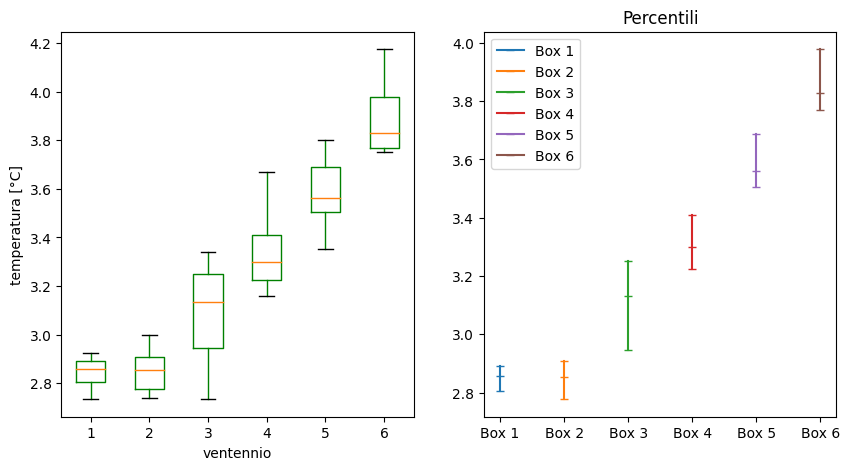

In [202]:
a=df['TEMP']
c = [1,2,3,4,5,6]
subsets = [a[i:i+20] for i in range(0, len(a), 20)]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
box=ax[0].boxplot(subsets,whiskerprops=dict(color='green'))
plt.setp(box['boxes'], color='green')
ax[0].set_xlabel('ventennio')
ax[0].set_ylabel('temperatura [°C]')
etichette = ['1900', '1920', '1940','1960', '1980', '2000']


percentiles = [np.percentile(d, [25, 50, 75]) for d in subsets]
print(percentiles)
for i, p in enumerate(percentiles):
    ax[1].plot(c[i:i+1]*3,p,marker='_',label=f"Box {i+1}")
ax[1].set_xticks(c)
ax[1].set_xticklabels(["Box 1", "Box 2", "Box 3", "Box 4", "Box 5", "Box 6"])
ax[1].set_title("Percentili")
ax[1].legend()

plt.show()


[0.0857549999999998, 0.13016749999999977, 0.30548250000000055, 0.1831450000000001, 0.18320500000000006, 0.20973500000000023]


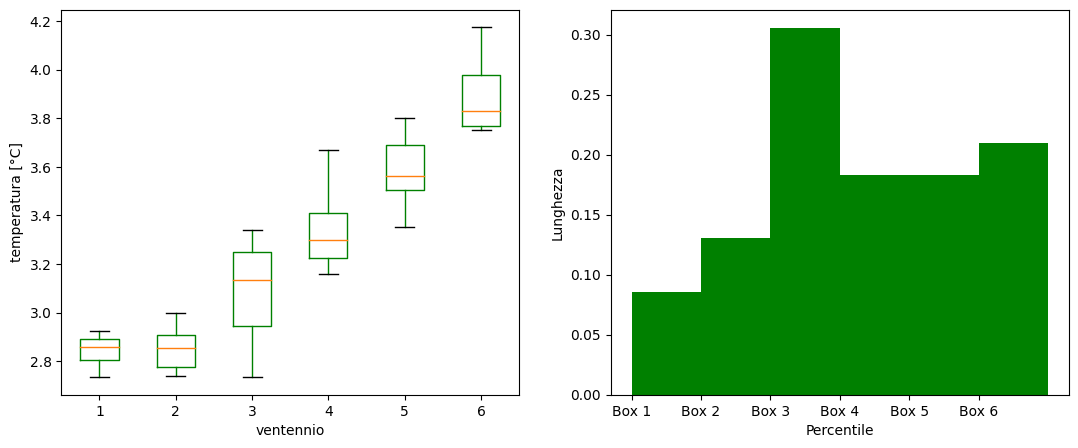

In [212]:
a=df['TEMP']
c = [1,2,3,4,5,6]
subsets = [a[i:i+20] for i in range(0, len(a), 20)]
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))
box=ax[0].boxplot(subsets,whiskerprops=dict(color='green'))
plt.setp(box['boxes'], color='green')
ax[0].set_xlabel('ventennio')
ax[0].set_ylabel('temperatura [°C]')
etichette = ['1900', '1920', '1940','1960', '1980', '2000']


percentiles = [np.percentile(d, [25, 50, 75]) for d in subsets]
percentile_lengths = [(p[2]-p[0]) for p in percentiles]
print(percentile_lengths)
x_indexes = np.arange(len(percentile_lengths))
ax[1].set_xlabel('Percentile')
ax[1].set_ylabel('Lunghezza')
ax[1].bar(x_indexes, percentile_lengths, width=1, color='green',align='edge')
ax[1].set_xticks(x_indexes)
ax[1].set_xticklabels([f'Box {i+1}' for i in range(len(percentile_lengths))])

# mostra il grafico
plt.show()



[0.0857549999999998, 0.13016749999999977, 0.30548250000000055, 0.1831450000000001, 0.18320500000000006, 0.20973500000000023]


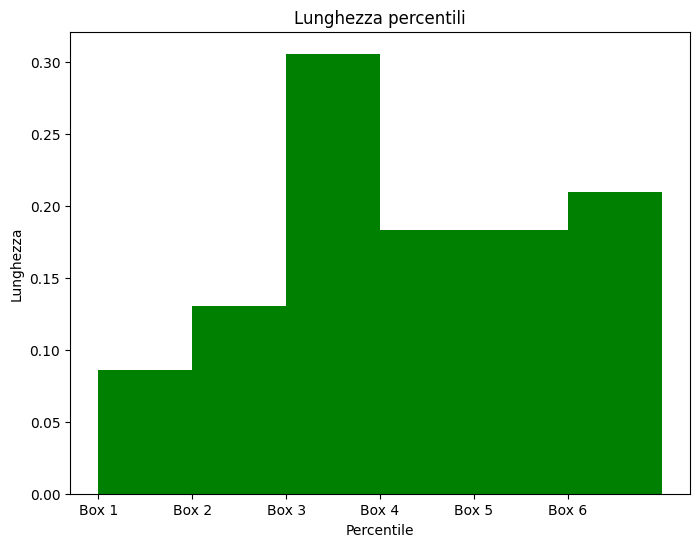

In [211]:





# crea una lista con la lunghezza di ogni percentile
percentile_lengths = [(p[2]-p[0]) for p in percentiles]
print(percentile_lengths)

# crea una lista con gli indici delle barre
x_indexes = np.arange(len(percentile_lengths))

# crea la figura e i due assi
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Percentile')
ax.set_ylabel('Lunghezza')
ax.set_title('Lunghezza percentili')

# crea le barre del grafico
ax.bar(x_indexes, percentile_lengths, width=1, color='green',align='edge')

# imposta le etichette dell'asse x
ax.set_xticks(x_indexes)
ax.set_xticklabels([f'Box {i+1}' for i in range(len(percentile_lengths))])

# mostra il grafico
plt.show()
